In [ ]:
                  ###  Prinipal Component Analysis of Eigen-Faces  ####

In [57]:
#import necessary library

import pandas as pd 
import numpy as np 
from sklearn.decomposition import PCA
from sklearn import preprocessing
%matplotlib inline
import matplotlib.image as mpimg
from numpy import diag
from numpy import zeros
from scipy.linalg import svd
import os

os.chdir(r"C:\Users\LENOVO\Documents\faces_4") #point to current directory
shapes = ['mitchell','night','phoebe','saavik','steffi','sz24','tammo','an2i','at33','boland','bpm','ch4f','cheyer','choon','danieln','glickman','karyadi','kawamura','kk49','megak']    #saving the list of the folders in shapes folder
path = "C:/Users/LENOVO/Documents/faces_4/"  #path for the images folder in local
files = []                                   # for storing all the images path 
result = []                                  # for storing the image
for shape in shapes:                                       
     new_path = path + shape                               
     for file in os.listdir(new_path):                     
        files.append(os.path.join(new_path,file))       
        result.append(shape)

print(len(files))                               #printinf the lenght of the files

#This part of code is used to read the images from the paths stored in files array and construct data frame from images array
def rgb2gray(img):
    return np.dot(img[...,:3], [0.299, 0.587, 0.114])
originalimages = [] #list to store images
images = [] #list for images  
for file in files:
    img = mpimg.imread(file)
    img = rgb2gray(img)
    originalimages.append(img)
    img = np.ravel(img)
    images.append(img)

print(len(images))
df = pd.DataFrame(images)    #converting our list into DataFrame
df.head()                    # printing the header of dataframe
images[0:2]

624
624


[array([ 9.338, 14.252, 20.89 , 30.241, 21.997, 10.446,  9.055, 26.87 ,
        18.445, 14.327, 19.067, 18.005, 18.795, 13.598, 27.67 , 26.082,
         4.784,  5.681,  6.279,  6.578,  6.578,  6.578, 21.278,  9.869,
        13.563, 16.202, 27.619, 33.391,  4.805,  3.648]),
 array([ 9.452, 14.953, 22.89 , 32.828, 23.399, 11.033,  9.941, 27.87 ,
        19.032, 14.914, 19.953, 19.407, 20.268, 14.185, 28.958, 26.968,
         5.083,  5.98 ,  5.98 ,  5.681,  5.681,  5.382, 16.691,  7.467,
        11.346, 14.8  , 27.103, 33.462,  5.603,  5.244])]

In [ ]:
# The number of observation is slightly lower then the diemnsion fo the observation 

In [58]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,...,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000
mean,30.619090,30.747096,31.717303,29.854734,29.822417,26.673753,26.397925,27.466572,24.245659,26.010772,...,16.451268,15.749631,14.488851,14.046566,13.442252,13.293122,13.987146,15.972907,14.172434,16.848830
std,11.804315,11.060630,10.186797,9.806759,10.346903,13.119901,12.325152,12.989759,12.860349,13.587295,...,10.164135,9.734205,9.798895,9.023769,12.011685,10.492269,11.228270,14.410665,12.860976,15.812062
min,0.701000,6.249000,7.331000,6.565000,5.109000,2.462000,3.245000,5.283000,2.946000,3.359000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.114000
25%,24.043000,21.156500,24.145000,23.491000,23.679000,13.907000,14.014500,17.068750,10.608000,14.271000,...,10.498000,9.397000,7.819000,7.911250,6.000000,4.960500,2.712000,1.026000,2.019750,4.674250
50%,32.519500,32.185000,33.185000,31.970500,32.071000,28.016000,26.260000,27.870000,23.423000,24.524000,...,15.630000,13.828000,13.547000,13.375000,11.355500,11.670500,13.851500,15.610000,12.204000,12.173000
75%,39.256000,38.484000,38.929000,36.633000,36.971500,38.185000,36.154000,39.185000,33.617000,35.231750,...,20.586500,23.230000,20.418500,20.295000,17.043500,17.477000,23.010250,25.457250,23.650000,27.361500
max,55.303000,56.965000,54.247000,52.555000,52.370000,52.484000,53.071000,53.484000,53.185000,53.396000,...,42.524000,39.000000,39.598000,40.196000,56.989000,42.541000,42.785000,100.660000,130.624000,136.408000


In [59]:
#Before we do PCA, we have to centre and scale the data

scaled_data= preprocessing.scale(df.T)
print(scaled_data)

[[-0.73082864 -0.70493447 -0.6183073  ...  0.85626479  0.849959
   0.93875487]
 [-0.15093641 -0.08610974 -0.05198755 ...  0.86642683  0.93742584
   0.93875487]
 [ 0.63240195  0.80674825  0.8282628  ...  0.95556754  0.91127326
   0.86160219]
 ...
 [ 2.10762231  1.99602566  1.94453734 ... -0.81022065 -0.55239682
  -0.71523849]
 [-1.26575976 -1.13792054 -1.21459106 ... -1.13041405 -0.58073607
  -1.08907199]
 [-1.40229523 -1.17830557 -1.66820004 ... -1.41147469 -1.1683383
  -1.36363454]]


In [60]:
#Import and apply PCA
pca= PCA()
pca.fit(scaled_data)
pca_data=pca.transform(scaled_data)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[3.65536488e-01 1.33691085e-01 9.05071647e-02 7.86895011e-02
 6.71403810e-02 6.48327539e-02 5.14519830e-02 3.93091752e-02
 2.27555306e-02 1.98046935e-02 1.68223337e-02 1.25415570e-02
 8.31334679e-03 7.82370129e-03 7.75215526e-03 4.30355293e-03
 2.93620021e-03 1.47449275e-03 1.23263599e-03 7.68196728e-04
 6.18729017e-04 4.78778774e-04 3.55916933e-04 2.32480648e-04
 2.01181501e-04 1.56923707e-04 1.23054790e-04 8.49519131e-05
 6.10537376e-05 8.54831456e-33]


In [61]:
pca = PCA(.95)
lower_dimensional_data = pca.fit_transform(df)
print(lower_dimensional_data)

[[-33.97248268  11.54993995  11.30726855 ...   3.50748777  -9.40210761
  -18.85391149]
 [-32.73313746  12.32582132  15.84783324 ...   4.8859378   -9.48953894
  -19.64588735]
 [-37.26230542   9.50192504  15.49172463 ...   3.58814369  -8.09173942
  -18.7989337 ]
 ...
 [ 13.72924798 -18.68174375   5.57593577 ...  -5.23522528  -4.57087928
   -1.77202887]
 [ 25.93452629 -15.54881004   4.68667788 ...  -2.38565722  -5.28949882
   -1.46627042]
 [ 18.49977204 -18.65494343   5.64573163 ...  -4.44362351  -4.57933503
   -1.0091481 ]]


In [62]:
pca.n_components_

11

In [63]:
tot = sum(pca.explained_variance_)
tot

4297.343151888317

In [64]:
pca.explained_variance_

array([1763.1386982 ,  594.81743359,  473.83630724,  394.16737023,
        337.34341908,  236.13380223,  159.81736545,  100.15868958,
         92.74445562,   82.64696101,   62.53864966])

In [65]:
pca.explained_variance_ratio_

array([0.39380461, 0.13285503, 0.10583338, 0.08803898, 0.0753471 ,
       0.0527415 , 0.0356959 , 0.02237087, 0.02071487, 0.01845955,
       0.01396828])

In [66]:
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
print(var_exp[0:5])

[41.02857593364433, 13.841515852056185, 11.026261820297053, 9.17235036377967, 7.85004611359887]


In [67]:
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
print(var_exp[0:5])

[41.02857593364433, 13.841515852056185, 11.026261820297053, 9.17235036377967, 7.85004611359887]


In [68]:
cum_var_exp = np.cumsum(var_exp)

In [69]:

# Indices corresponding to the first occurrence are returned with the np.argmax function
# Adding 1 to the end of value in list as principal components start from 1 and indexes start from 0 (np.argmax)
componentsVariance = [30, np.argmax(cum_var_exp > 90) + 1, np.argmax(cum_var_exp > 80) + 1, np.argmax(cum_var_exp > 50) + 1]

In [70]:
# Principal componenet needed to expain 90%, 80% and 50% variance

In [71]:
componentsVariance

[30, 7, 5, 2]

In [72]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.39380461, 0.13285503, 0.10583338, 0.08803898, 0.0753471 ,
       0.0527415 , 0.0356959 , 0.02237087, 0.02071487, 0.01845955,
       0.01396828])

In [73]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.39380461 0.13285503 0.10583338 0.08803898 0.0753471  0.0527415
 0.0356959  0.02237087 0.02071487 0.01845955 0.01396828]


In [74]:
# project 1, 2, 10 and 100 PCAs

uint8
(30, 32)


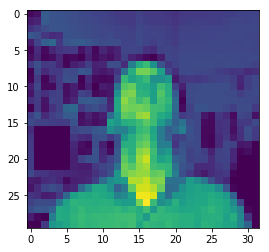

In [75]:
# load and display ane image mitchell_up_angry_open_4.pgm with Matplotlib for 1,2 10 and 100 PCs.
%matplotlib inline
import matplotlib.image as mpimg
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
import os
#dir =os.chdir(r"C:\Users\LENOVO\Documents\faces_4"
data = image.imread(r"C:\Users\LENOVO\Documents\faces_4\mitchell\mitchell_up_angry_open_4.pgm")
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

In [76]:
pca = PCA(n_components=1)
pca.fit(data)
print(pca.components_)

[[ 0.00913665 -0.00071567  0.01749083  0.09204747  0.15511776  0.18097921
   0.20119619  0.24186563  0.23003731  0.24712252  0.25177388  0.24332793
   0.19196434  0.12831953  0.15968577  0.18115447  0.20616011  0.19751169
   0.16952185  0.13752001  0.20409026  0.18623747  0.20046418  0.2003371
   0.2208411   0.22702708  0.20060763  0.16747727  0.13590788  0.05949002
  -0.0483147  -0.09141484]]


In [77]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.50517354])

In [78]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data)
print(pca.components_)

[[ 0.00913665 -0.00071567  0.01749083  0.09204747  0.15511776  0.18097921
   0.20119619  0.24186563  0.23003731  0.24712252  0.25177388  0.24332793
   0.19196434  0.12831953  0.15968577  0.18115447  0.20616011  0.19751169
   0.16952185  0.13752001  0.20409026  0.18623747  0.20046418  0.2003371
   0.2208411   0.22702708  0.20060763  0.16747727  0.13590788  0.05949002
  -0.0483147  -0.09141484]
 [-0.028949    0.02589078  0.09254276  0.12571505  0.14834681  0.17631764
   0.14264712  0.15941155  0.14552572  0.09996905  0.10925704  0.07099338
  -0.0893855  -0.30618126 -0.33529798 -0.36740201 -0.39193544 -0.31068407
  -0.26972095 -0.18874703  0.0017272   0.06886582  0.05111146  0.06235287
   0.11585907  0.13840698  0.10467751  0.09863141  0.16226772  0.14248921
   0.07150695  0.05659251]]


In [79]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.50517354, 0.2967965 ])

In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(data)
print(pca.components_)

[[ 0.00913665 -0.00071567  0.01749083  0.09204747  0.15511776  0.18097921
   0.20119619  0.24186563  0.23003731  0.24712252  0.25177388  0.24332793
   0.19196434  0.12831953  0.15968577  0.18115447  0.20616011  0.19751169
   0.16952185  0.13752001  0.20409026  0.18623747  0.20046418  0.2003371
   0.2208411   0.22702708  0.20060763  0.16747727  0.13590788  0.05949002
  -0.0483147  -0.09141484]
 [-0.028949    0.02589078  0.09254276  0.12571505  0.14834681  0.17631764
   0.14264712  0.15941155  0.14552572  0.09996905  0.10925704  0.07099338
  -0.0893855  -0.30618126 -0.33529798 -0.36740201 -0.39193544 -0.31068407
  -0.26972095 -0.18874703  0.0017272   0.06886582  0.05111146  0.06235287
   0.11585907  0.13840698  0.10467751  0.09863141  0.16226772  0.14248921
   0.07150695  0.05659251]
 [ 0.04876656 -0.07695359  0.02212378 -0.14309332 -0.2367921  -0.19864726
  -0.09279232  0.02249449  0.03380582  0.16244947  0.14963401  0.16757414
  -0.26945948 -0.40923081 -0.14144899  0.18727099  0.218235

In [82]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.50517354, 0.2967965 , 0.06865813, 0.0292773 , 0.02317117,
       0.02076437, 0.01190271, 0.01124144, 0.00868164, 0.00533371])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
pca.fit(data)
print(pca.components_)

In [ ]:
# In ordere to project for 100 PCs n_components=100 must be between 0 and min(n_samples, n_features)=30 with svd_solver='full